In [2]:
import numpy as np
import matplotlib.pyplot as plt

The system of equations we would like to solve is:

\begin{align}
    \begin{bmatrix}
        K^1_{11} & K^1_{12}            & 0                   & 0                         & 0\\
        K^1_{21} & K^1_{22} + K^2_{11} & K^2_12              & 0                         & 0\\
        0        & K^2_{21}            & K^2_{22} + K^3_{11} & \ddots                    & \vdots\\
        \vdots   & \cdots              & \ddots              & \ddots                    &\vdots\\
        0        & \cdots              & 0                   & K^{n-2}_{22} + K^{n-1}_{11} & K^{n-1}_{12}\\
        0        & \cdots              & 0                   & K^{n-1}_{21}                & K^{n-1}_{22}
    \end{bmatrix} 
    \begin{bmatrix}
        T_1 \\
        \vdots \\
        T_n
    \end{bmatrix} = 
    \begin{bmatrix}
        Q^1_1 \\
        Q^1_2 + Q^2_1 \\
        Q^2_2 + Q^3_1 \\
        \vdots \\
        Q^{n-2}_2 + Q^{n-1}_1 \\
        Q^{n-1}_2
    \end{bmatrix}
\end{align}

We know both $T_1$ and $T_n$ so this can be rewritten as:

\begin{align}
    \begin{bmatrix}
        K^1_{22} + K^2_{11} & K^2_12              & 0      & \cdots       & 0\\
        K^2_{21}            & K^2_{22} + K^3_{11} & \ddots & \vdots            & \vdots\\
        \vdots              & \ddots              & \ddots & K^{n-2}_{11} & K^{n-2}_{12}\\
        0              & \cdots                   & 0      & K^{n-2}_21   & K^{n-2}_{22} + K^{n-1}_{11} \\
    \end{bmatrix} 
    \begin{bmatrix}
        T_2 \\
        \vdots \\
        T_{n-1}
    \end{bmatrix} = 
    \begin{bmatrix}
        Q^1_2 + Q^2_1 - K^1_{21}T_1 \\
        Q^2_2 + Q^3_1 \\
        \vdots \\
        Q^{n-3}_2 + Q^{n-1}_1 \\
        Q^{n-2}_2 + Q^{n-1}_1 - K^{n-1}_{12}T_n
    \end{bmatrix}
\end{align}

In [79]:
TA = 100
TB = 200
n = 6
t = 0.02
S = 1000000
k = 0.5
A = 1


L = t/n
x = np.linspace(0,t,n)

In [122]:
K = np.zeros((n-2,n-2))

Ke = np.zeros((n-1, 2, 2))
Qe = np.zeros((n-1, 1, 2))
for i in range(len(Ke)):
    Ke[i] = (A*k)/L * np.array([[1, -1],
                                [-1, 1]])
    Qe[i] = (S*A*L)/2*np.array([1, 1])

for i in range(n-3):
    for j in range(n-3):
        if i==j:
            K[i:i+2, j:j+2] += Ke[i]
            
K[0, 0] += Ke[0, 1, 1]
K[-1, -1] += Ke[-1, 0, 0]

Q = np.zeros(n-2)
for i in range(n-3):
    Q[i:i+2] += Qe[i][0]

Q[0] += Qe[0,:,1]-Ke[0, 1, 0]*TA
Q[-1] += Qe[-1,:,0]-Ke[-1, 0, 1]*TB

T = np.zeros(n)
T[0] = TA
T[-1] = TB
T[1:-1] = np.linalg.solve(K,Q)


[1666.66666667 3333.33333333 3333.33333333 1666.66666667]
[18333.33333333  3333.33333333  3333.33333333  1666.66666667]
[18333.33333333  3333.33333333  3333.33333333 33333.33333333] [1666.66666667] -150.0


In [109]:
# exact sol
def analytical_T(TA,TB,S,k,t,x):
    return ((TB-TA)/t+(S/(2*k))*(t-x))*x+TA

(1000,) (1000,)


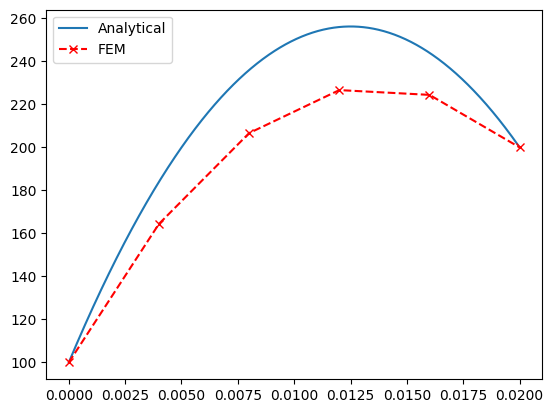

In [130]:
exact_arr = np.linspace(0,t,1000)
print(exact_arr.shape, analytical_T(TA,TB,S,k,t,exact_arr).shape)
plt.plot(exact_arr, analytical_T(TA,TB,S,k,t,exact_arr), label="Analytical")
plt.plot(x, T, "x--", color="r", label="FEM")
plt.legend()
plt.show()

In [112]:
K, Q

(array([[ 300., -150.,    0.,    0.],
        [-150.,  300., -150.,    0.],
        [   0., -150.,  300., -150.],
        [   0.,    0., -150.,  300.]]),
 array([18333.33333333,  3333.33333333,  3333.33333333, 33333.33333333]))